In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.integrate import odeint
from ipywidgets import interact

## Phase Space Vizualization in 1D

State Space :

$$ X = \begin{pmatrix} x \\ v \end{pmatrix}$$

and the phase space dynamics are :

$$ \partial _t \begin{pmatrix} x \\ v \end{pmatrix} = \begin{pmatrix} v \\ \frac{F}{m} \end{pmatrix} $$


__General ODE Integration__

In [2]:
def phasespaceplot(func,tmax=10,args=(),plot_size=2,Nparticles=100) :
    x0arr,v0arr = np.random.random(Nparticles)*2-1,np.random.random(Nparticles)*2-1
    t = np.linspace(0,tmax,tmax*10)
    plt.figure(figsize=(10,10))
    plt.xlim([-plot_size,plot_size])
    plt.ylim([-plot_size,plot_size])
    plt.xlabel("x")
    plt.ylabel("v")
    for x0,v0 in zip(x0arr,v0arr) :
        sol = odeint(func,(x0,v0),t,args)
        plt.scatter(x0,v0,color="black")
        plt.plot(sol[:, 0], sol[:, 1],linewidth=0.8)

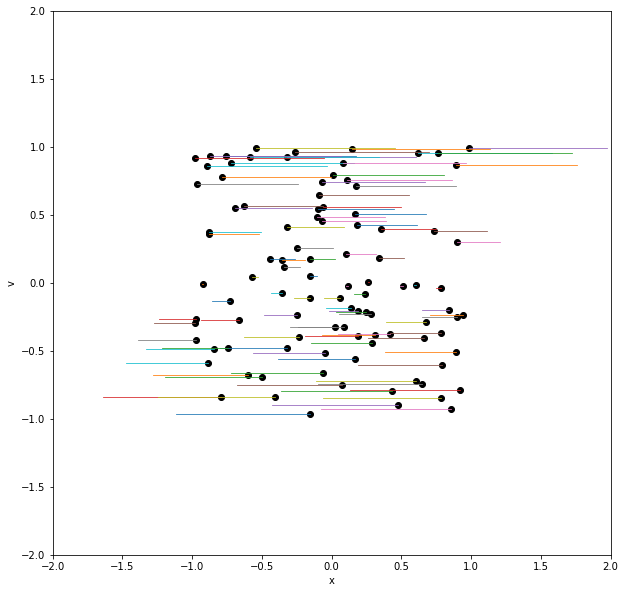

In [3]:
def force_free(state,t) : 
    x,v = state
    return v,0
phasespaceplot(force_free,tmax=1)

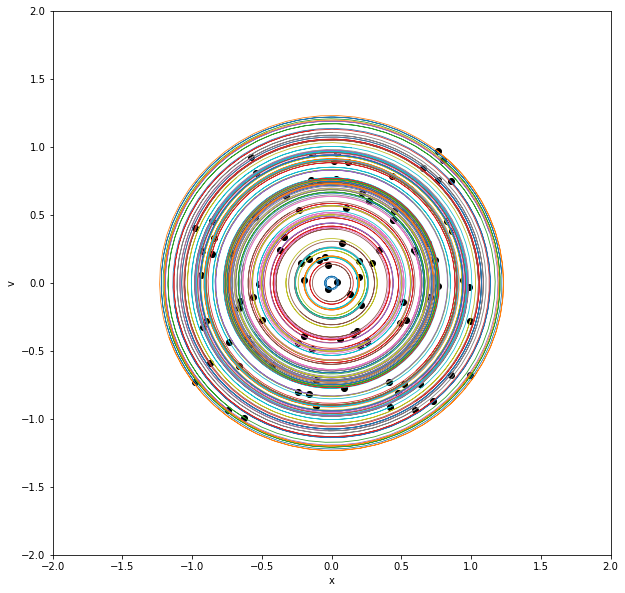

In [4]:
def shm(state,t,omega) : 
    x,v = state
    return v, -omega**2*x
phasespaceplot(shm,tmax=10,args=(1,))

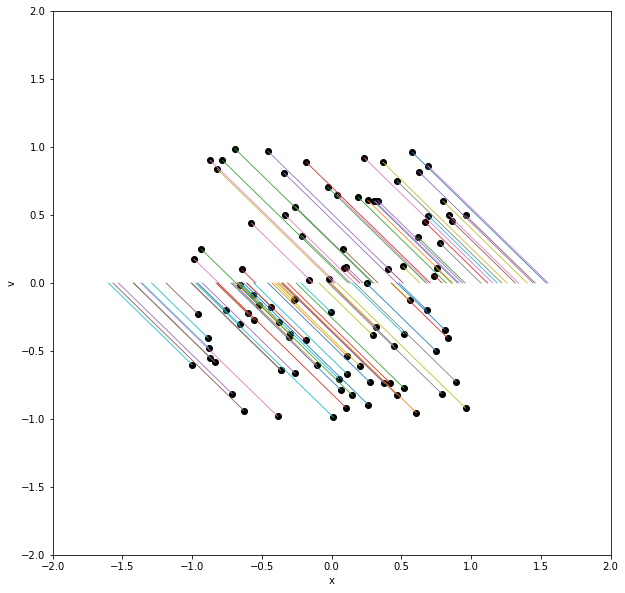

In [5]:
def damping(state,t,k) : 
    x,v = state
    return v, -k*v
phasespaceplot(damping,tmax=10,args=(1.,))

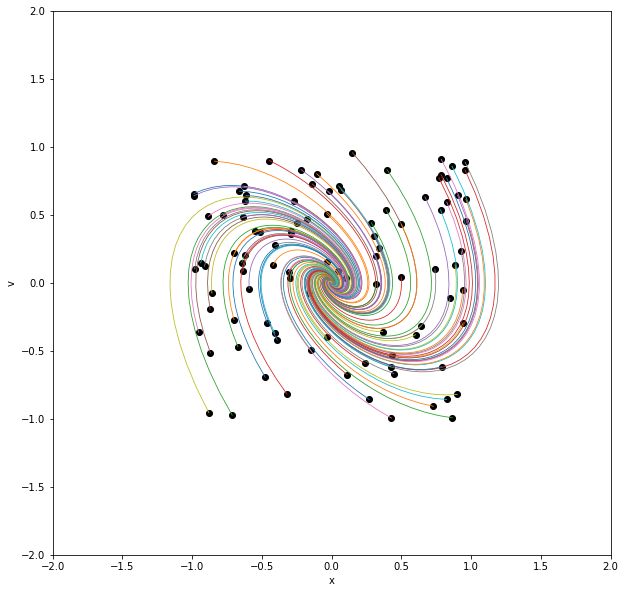

In [6]:
def damped_shm(state,t,k,omega) : 
    x,v = state
    return v, -k*v-omega**2*x
phasespaceplot(damped_shm,tmax=10,args=(1.0,1.0))

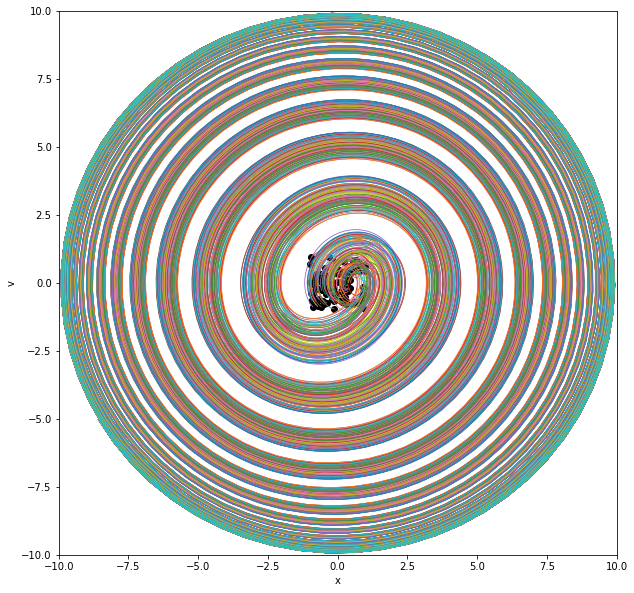

In [8]:
def driven_damped_shm(state,t,k,omega,omega_drive) : 
    x,v = state
    return v, -omega**2*x-k*v + np.sin(omega_drive*t)
phasespaceplot(driven_damped_shm,tmax=100,args=(0.1,1.0,1.0),plot_size=10)

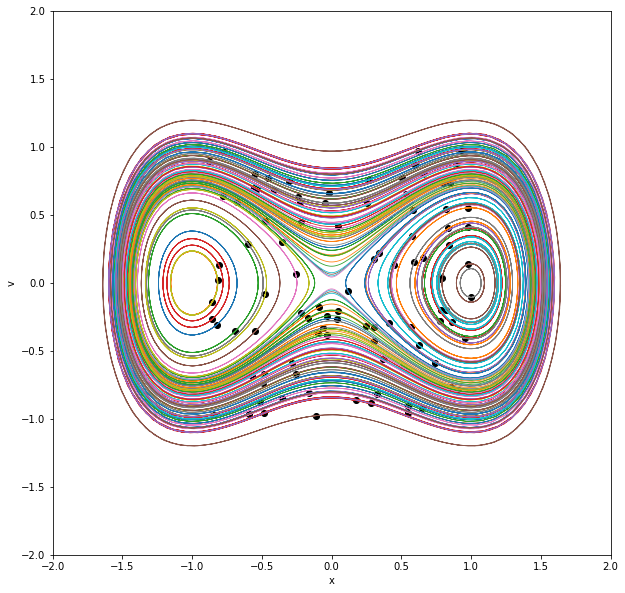

In [9]:
def potential_well(state,t,k) :
    x,v=state
    return v, x-k*x**3
phasespaceplot(potential_well,tmax=20,args=(1.0,),plot_size=2)

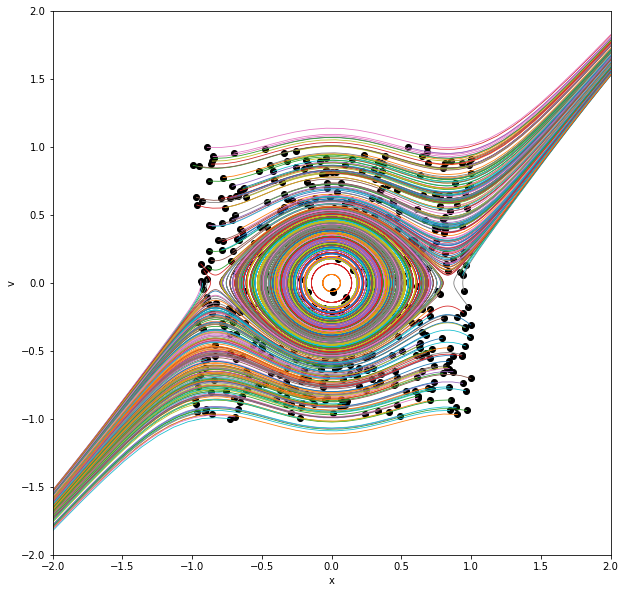

In [10]:
def potential_milo(state,t,k) :
    x,v=state
    return v, x-2*k*x*np.exp(-k*x**2)
phasespaceplot(potential_milo,tmax=20,args=(1.0,),plot_size=2,Nparticles=500)

## Phase Space Vizualization in 3D

In [21]:
def phasespace6d(func,tmax=1,tsteps=10,args=(),xplot_size=2,vplot_size=2,Nparticles=10,
                ret=False) :
    x0arr,v0arr = (np.array([np.random.random(Nparticles)*2-1 for i in [0,1,2]]).T,
                   np.array([np.random.random(Nparticles)*2-1 for i in [0,1,2]]).T
                  )
    xv = []
    t = np.linspace(0,tmax,tsteps)
    plt.figure(figsize=(20,10))
    ax_x = plt.subplot(121,projection='3d')
    ax_v = plt.subplot(122,projection='3d')
    for ax,plot_size in zip([ax_x,ax_v],[xplot_size,vplot_size]) :
        ax.set_xlim([-plot_size,plot_size])
        ax.set_ylim([-plot_size,plot_size])
        ax.set_zlim([-plot_size,plot_size])
    ax_x.set_title("Position",fontsize=17)
    ax_x.set_xlabel("x")
    ax_x.set_ylabel("y")
    ax_x.set_zlabel("z")
    ax_v.set_title("Velocity",fontsize=17)
    ax_v.set_xlabel("$v_x$")
    ax_v.set_ylabel("$v_y$")
    ax_v.set_zlabel("$v_z$")
    for x0,v0 in zip(x0arr,v0arr) : 
        sol = odeint(func,tuple(x0)+tuple(v0),t,args)
        ax_x.plot(sol[:,0],sol[:,1],sol[:,2],linewidth=0.8)
        ax_x.scatter(*tuple(x0),color="black")
        ax_v.plot(sol[:,3],sol[:,4],sol[:,5],linewidth=0.8)
        ax_v.scatter(*tuple(v0),color="black")
        xv.append(sol)
    if ret == True : return xv


### Force Free

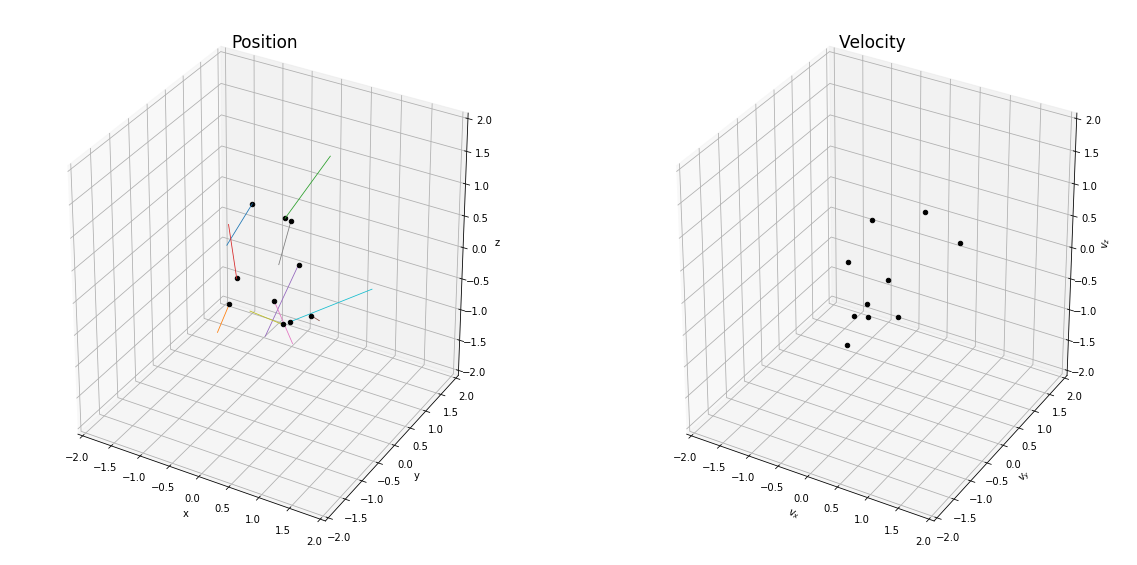

In [12]:
def forcefree(state,t) : 
    x,y,z,vx,vy,vz=state
    return vx,vy,vz,0,0,0
phasespace6d(forcefree,vplot_size=2)

### Lorentz Force

$$ \boldsymbol{F}_q = q\boldsymbol{E} +q\boldsymbol{v}\times\boldsymbol{B} $$

Let's set $\boldsymbol{E} = 0$ and $\boldsymbol{B} = B_0 \hat{z}$

Then the equation of motion for a particle of charge $q$, mass $m$: 

$$\partial_t
\begin{pmatrix}
x \\
y\\
z\\
v_x\\
v_y\\
v_z
\end{pmatrix} =
\begin{pmatrix}
v_x \\
v_y\\
v_z\\
\frac{qB_0}{m}v_y\\
-\frac{qB_0}{m}v_x\\
0
\end{pmatrix}
$$

Define the __gyrofrequency__ :

$$
\omega_0 = \frac{qB_0}{m}
$$

which is a signed quantity.

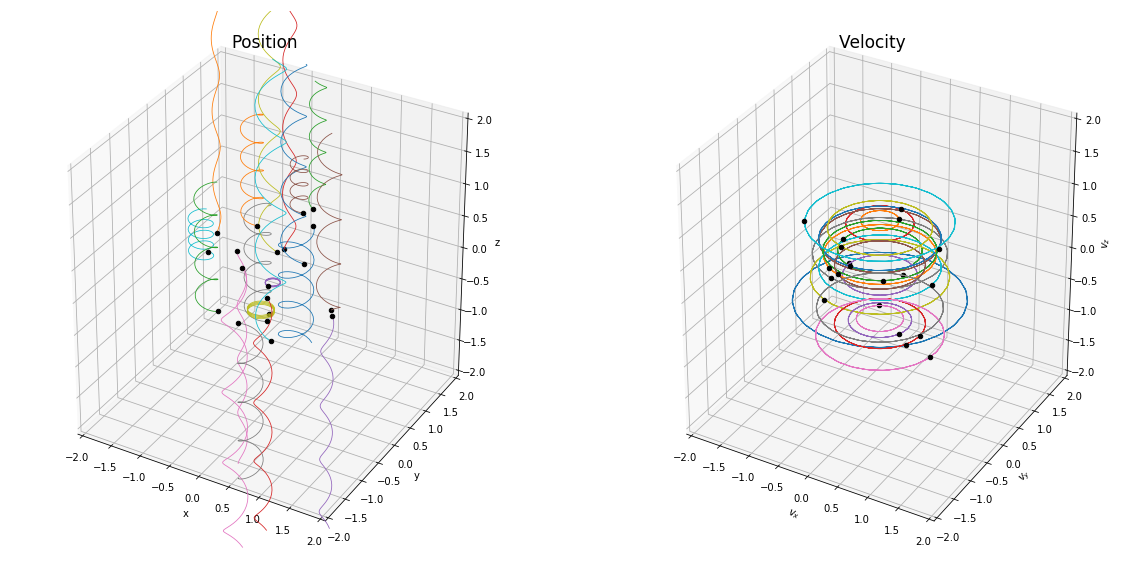

In [13]:
def uniform_Bz(state,t,omega_0) : 
    x,y,z,vx,vy,vz=state
    return vx,vy,vz,omega_0*vy,-omega_0*vx,0
phasespace6d(uniform_Bz,tmax=5,tsteps=100,args=(5,),Nparticles=20)

#### Arbitrary Direction $\boldsymbol{B_0}$

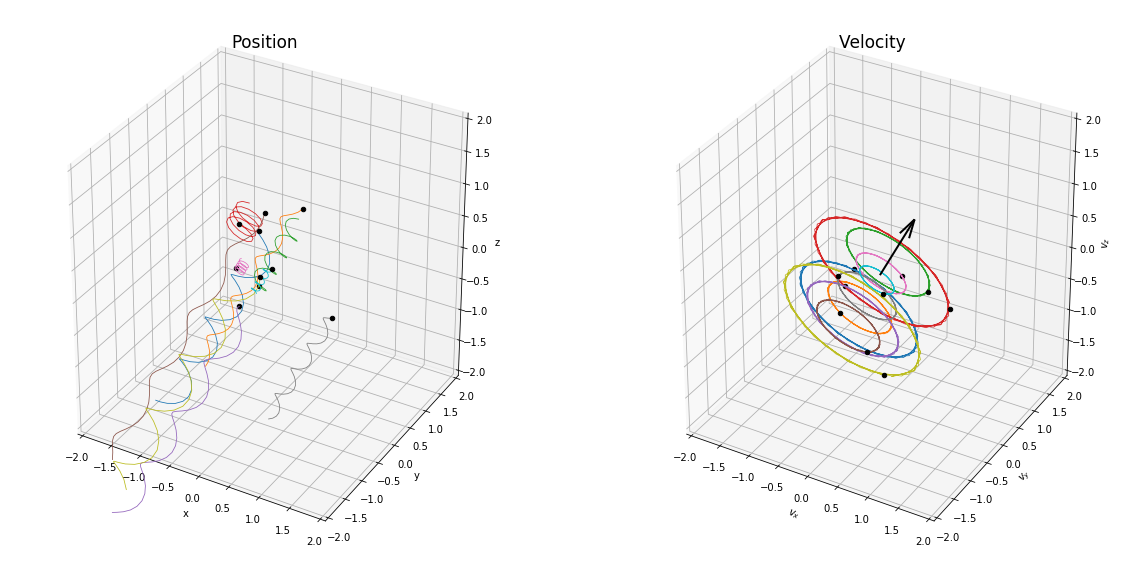

In [14]:
def uniform_B(state,t,omega_0,az,el) : 
    x,y,z,vx,vy,vz=state
    omega_vec = omega_0 * np.array([np.sin(np.radians(el))*np.cos(np.radians(az)),
                                    np.sin(np.radians(el))*np.sin(np.radians(az)),
                                    np.cos(np.radians(el))
                                  ])
    vdot = np.cross(np.array([vx,vy,vz]),omega_vec)
    return vx,vy,vz,vdot[0],vdot[1],vdot[2]

def change_B_dir(az=10,el=70) :
    phasespace6d(uniform_B,tmax=5,tsteps=50,args=(5,az,el),Nparticles=10)
    vec = np.array([np.sin(np.radians(el))*np.cos(np.radians(az)),
                                        np.sin(np.radians(el))*np.sin(np.radians(az)),
                                        np.cos(np.radians(el))
                                      ])
    plt.quiver(0,0,0,vec[0],vec[1],vec[2],linewidth=2,color="black")
    
#interact(change_B_dir,az=(0,360,10),el=(0,180,10))

change_B_dir(az=30,el=30)

### Gravitation

#### Point Mass

$$\boldsymbol{a_G} = -\frac{GM}{(x^2+y^2+z^2)^\frac{3}{2}}\begin{pmatrix} x \\ y \\ z \end{pmatrix} $$

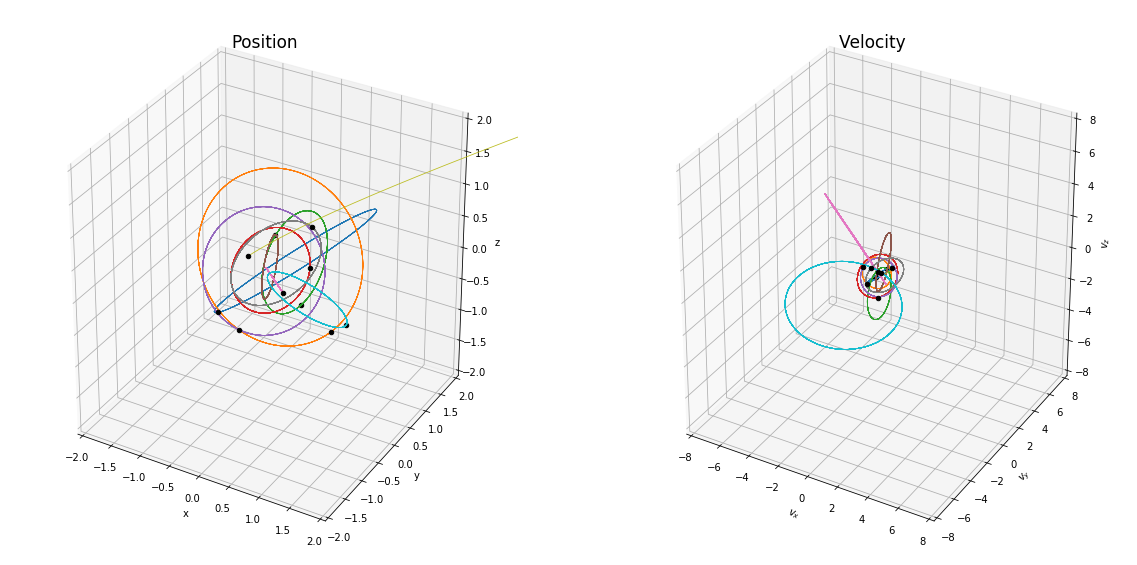

In [52]:
GMreal = 3.986004418e14 #m^3/s^3
def gravity_pointmass(state,t,GM = 1) : 
    x,y,z,vx,vy,vz=state
    r = (x**2+y**2+z**2)**0.5
    return vx,vy,vz,-GM*x/r**3,-GM*y/r**3,-GM*z/r**3
xv=phasespace6d(gravity_pointmass,tmax=50
                ,tsteps=100000,args=(1,),Nparticles=10,vplot_size=8,xplot_size=2,ret=True)

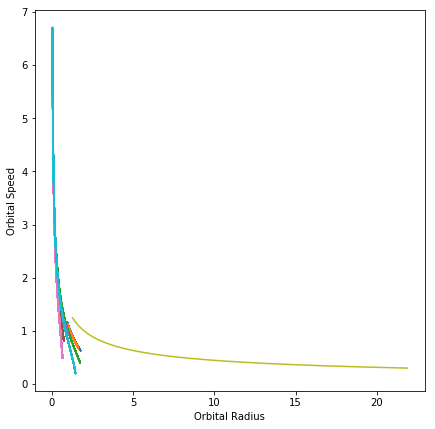

In [53]:
plt.figure(figsize=(7,7))
for xv_ in xv :
    r,v = np.linalg.norm(xv_[:,0:3],axis=1),np.linalg.norm(xv_[:,3:6],axis=1)
    plt.plot(r,v)
    plt.xlabel("Orbital Radius")
    plt.ylabel("Orbital Speed")